## Decision Trees vs Random Forests
In  this exercise, you will compare the decision tree classifier with random forests.
0. Visualize the created datasets
1. Use the train_test_split function to split the dataset into 30/70 sets (set random seed=1)
2. Fit a decision tree to all 6 datasets and report train and test accuracy (random seed=1, default hyperparameters)
3. Do the same for a random forest with 20 trees (random seed=1, default hyperparameters)
4. plot the decision contours on all 6 datasets and comment on their differences. 
5. What can you say about the bias and variance of each classifier? Do you observe any over or under-fitting?
6. plot the 2 ROC curves for each dataset in 6 different plots. Also report the area under each curve.


**Answers** <br>
Random forest looks like it outperforms all the Decision tree classifier in most cases. We also observe that in some cases the data is fit very perfectly and the train error is zero. This is the case of over fitting the data. In Random Forests the bias of the full model is equivalent to the bias of a single decision tree (which itself has high variance). By creating many of these trees, in effect a "forest", and then averaging them the variance of the final model can be greatly reduced over that of a single tree. In practice the only limitation on the size of the forest is computing time as an infinite number of trees could be trained without ever increasing bias and with a continual (if asymptotically declining) decrease in the variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import packages here
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
        


In [4]:
datasets=[]
for i in range(6):
    datasets.append((np.load('X{}.npy'.format(i)),np.load('y{}.npy'.format(i))))



In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(datasets[0][0], datasets[0][1], test_size=0.3, random_state=1)

Test Accuracy: 0.9333333333333333
Train Accuracy: 1.0


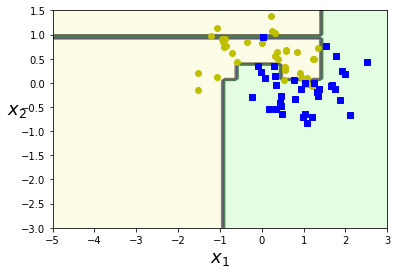

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


In [19]:

dtc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

Test Accuracy: 1.0
Train Accuracy: 1.0


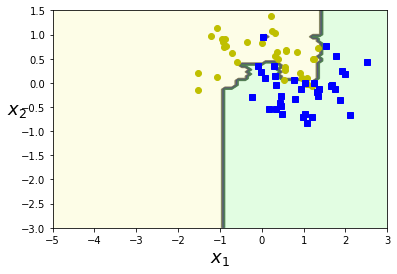

In [20]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))

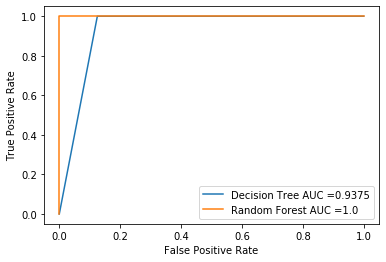

In [21]:

rf_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(dtc_fpr, dtc_tpr, label = 'Decision Tree AUC ='+str(dtc_auc))
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC ='+str(rf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Test Accuracy: 0.6333333333333333
Train Accuracy: 1.0


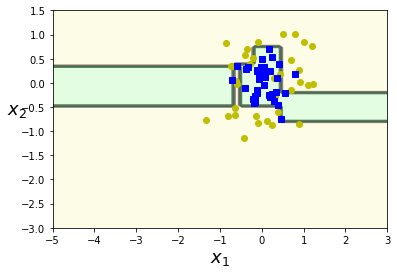

In [22]:
X_train, X_test, y_train, y_test = train_test_split(datasets[1][0], datasets[1][1], test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


In [23]:

dtc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

Test Accuracy: 0.7333333333333333
Train Accuracy: 0.9857142857142858


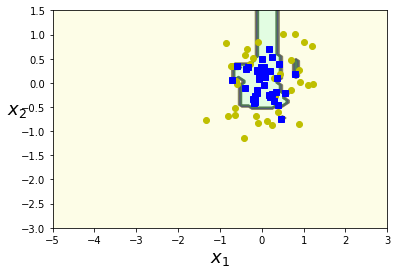

In [24]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


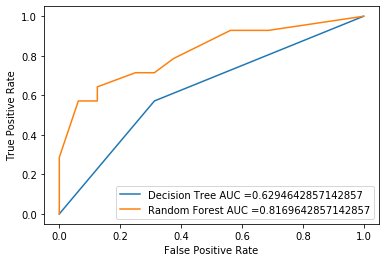

In [25]:

rf_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(dtc_fpr, dtc_tpr, label = 'Decision Tree AUC ='+str(dtc_auc))
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC ='+str(rf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Test Accuracy: 0.8333333333333334
Train Accuracy: 1.0


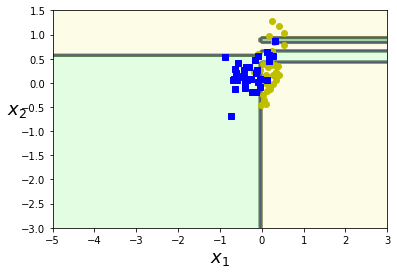

In [26]:
X_train, X_test, y_train, y_test = train_test_split(datasets[2][0], datasets[2][1], test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


In [27]:

dtc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

Test Accuracy: 0.8333333333333334
Train Accuracy: 0.9857142857142858


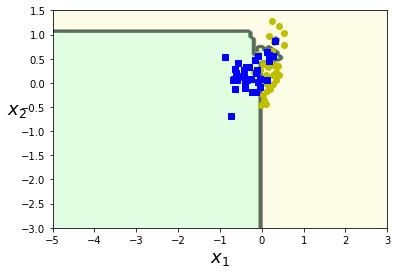

In [28]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


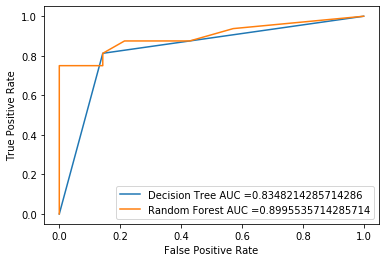

In [29]:

rf_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(dtc_fpr, dtc_tpr, label = 'Decision Tree AUC ='+str(dtc_auc))
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC ='+str(rf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Test Accuracy: 0.9666666666666667
Train Accuracy: 1.0


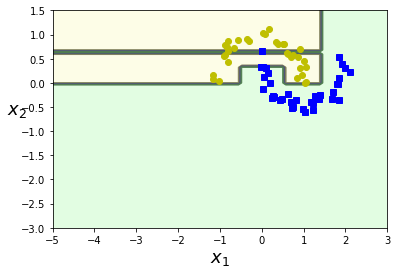

In [30]:
X_train, X_test, y_train, y_test = train_test_split(datasets[3][0], datasets[3][1], test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


In [31]:

dtc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

Test Accuracy: 1.0
Train Accuracy: 1.0


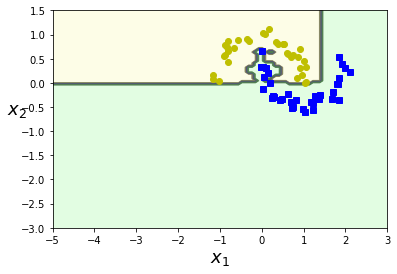

In [32]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


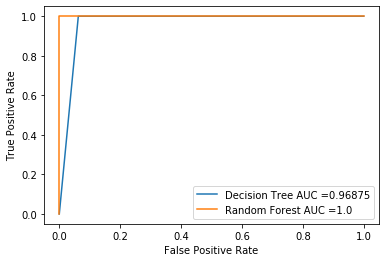

In [33]:

rf_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(dtc_fpr, dtc_tpr, label = 'Decision Tree AUC ='+str(dtc_auc))
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC ='+str(rf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Test Accuracy: 0.8666666666666667
Train Accuracy: 1.0


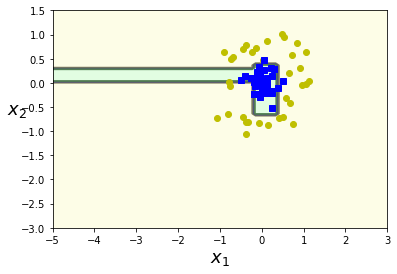

In [34]:
X_train, X_test, y_train, y_test = train_test_split(datasets[4][0], datasets[4][1], test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


In [35]:

dtc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

Test Accuracy: 0.9666666666666667
Train Accuracy: 1.0


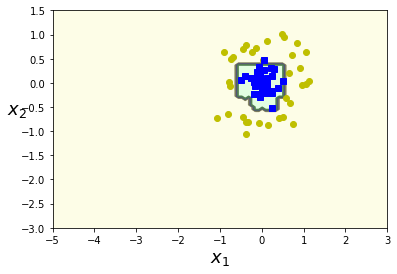

In [36]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


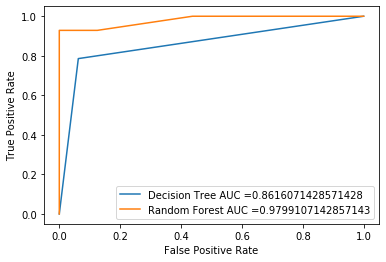

In [37]:

rf_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(dtc_fpr, dtc_tpr, label = 'Decision Tree AUC ='+str(dtc_auc))
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC ='+str(rf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

Test Accuracy: 1.0
Train Accuracy: 1.0


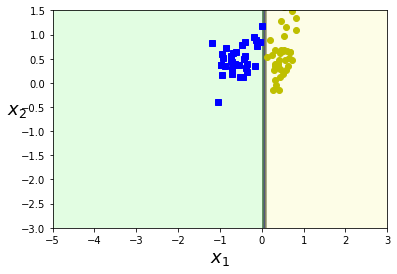

In [38]:
X_train, X_test, y_train, y_test = train_test_split(datasets[5][0], datasets[5][1], test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


In [39]:

dtc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

Test Accuracy: 1.0
Train Accuracy: 1.0


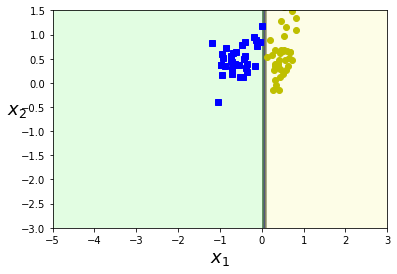

In [40]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, axes = [-5,3,-3,1.5])
print('Test Accuracy:' ,clf.score(X_test, y_test))
print('Train Accuracy:' ,clf.score(X_train, y_train))


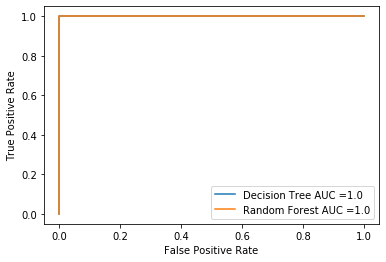

In [41]:

rf_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(dtc_fpr, dtc_tpr, label = 'Decision Tree AUC ='+str(dtc_auc))
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC ='+str(rf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

## Digit Classification
In this exercise you will perform handwritten digit classificaiton using random forests and study the effect of hyperparameters on random forests.
1. Load the digits dataset from sklearn and visualize 10 samples.
2. Vary the number of trees in a random forest classifier from 1 to 1000 in 10 logarithmic steps using the np.logspace function and plot the accuracy. Explain the results.
3. Observe the changes in performance when you vary the max depth of trees from 1 to 10 in steps of 1. Draw an accuracy heat-map by varying both the number of trees and max depth. Explain the results. (a heatmap is a 2D array of scalars. In this case the scalar is accuracy and the axes of the matrix vary the depth and number of trees)

**Answers** <br>
We observe that as we increase the number of trees we see higher accuracy. We also observe a dip in some cases of models. <br>
The results show that higher the number of trees and higher the depth of tree there will be a higher accuracy. Now this makes sense as usually the higher the number of trees the better to learn the data and the deeper the tree, the more splits it has and it captures more information about the data. 

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
from sklearn.linear_model import LogisticRegression

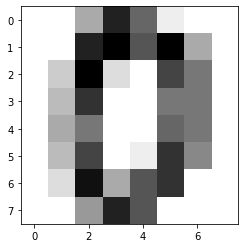

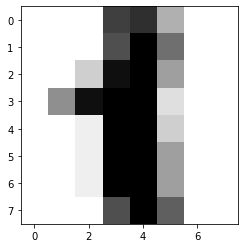

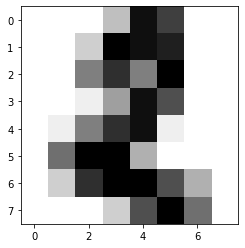

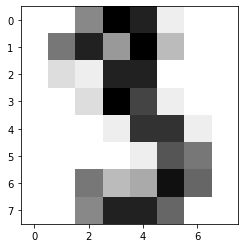

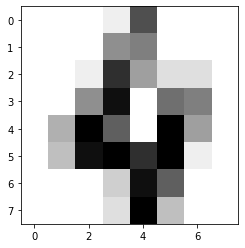

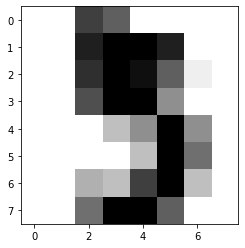

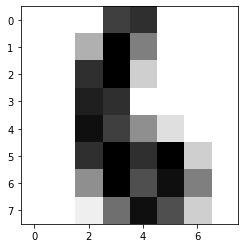

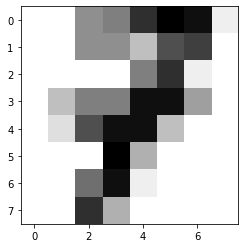

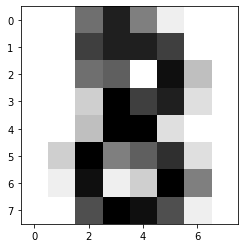

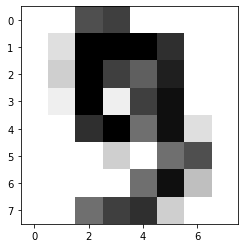

In [38]:
for i in range(10):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=1)


In [40]:
arr = np.logspace(0,3,num=10)

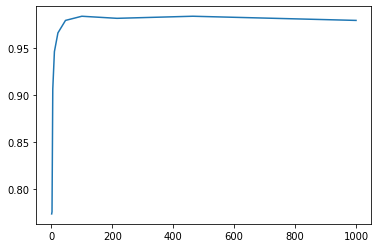

In [43]:
score = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i))
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score.append(acc)
plt.plot(arr, score)

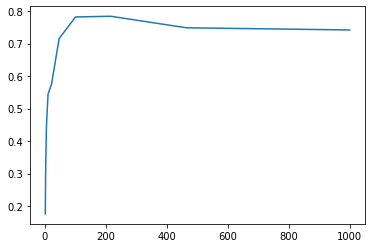

In [54]:
score_1 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=1)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_1.append(acc)
plt.plot(arr, score_1)

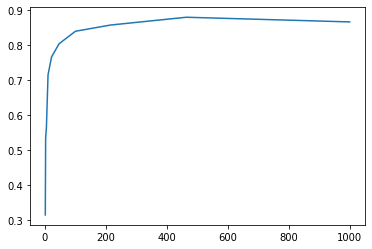

In [55]:
score_2 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=2)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_2.append(acc)
plt.plot(arr, score_2)

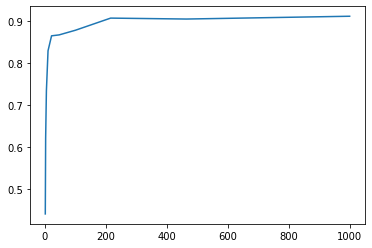

In [56]:
score_3 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=3)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_3.append(acc)
plt.plot(arr, score_3)

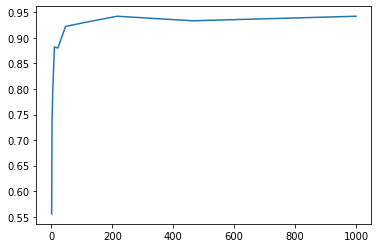

In [57]:
score_4 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=4)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_4.append(acc)
plt.plot(arr, score_4)

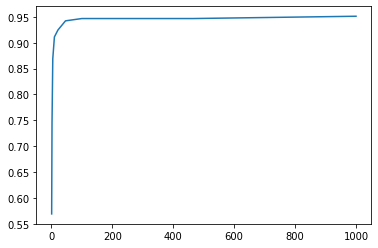

In [58]:
score_5 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=5)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_5.append(acc)
plt.plot(arr, score_5)

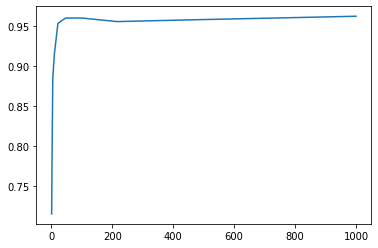

In [59]:
score_6 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=6)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_6.append(acc)
plt.plot(arr, score_6)

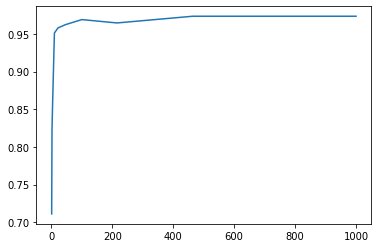

In [60]:
score_7 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=7)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_7.append(acc)
plt.plot(arr, score_7)

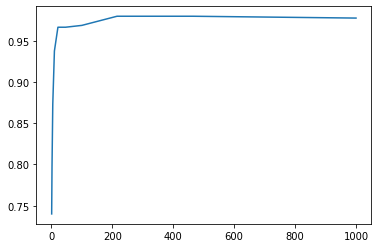

In [61]:
score_8 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=8)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_8.append(acc)
plt.plot(arr, score_8)

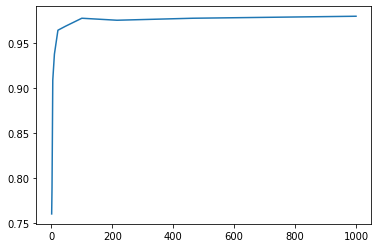

In [62]:
score_9 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=9)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_9.append(acc)
plt.plot(arr, score_9)

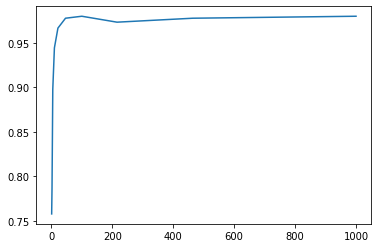

In [63]:
score_10 = []
for i in arr:
    clf = RandomForestClassifier(n_estimators=int(i), max_depth=10)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    score_10.append(acc)
plt.plot(arr, score_10)

In [69]:
heat = np.vstack((score_1,score_2, score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10))

In [75]:
import seaborn as sns
arr = [int(x) for x in arr]

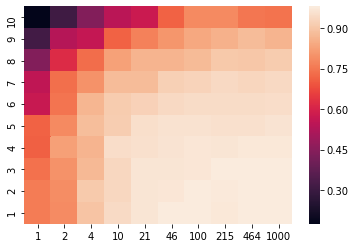

In [79]:
sns.heatmap(heat, xticklabels=arr, yticklabels=[10,9,8,7,6,5,4,3,2,1])